In [1]:
'''
Numpy Reference Guide

Sources:
    http://www.engr.ucsb.edu/~shell/che210d/numpy.pdf
    Book: Python for Data Analysis (Chapter 4)
'''

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/sinanozdemir/anaconda/envs/sfdat26-env/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# create ndarrays from lists
# note: every element must be the same type (will be converted if possible)
data1 = [6, 7.5, 8, 0, 1]           # list
arr1 = np.array(data1)              # 1d array
arr1

array([ 6. ,  7.5,  8. ,  0. ,  1. ])

In [3]:
data2 = [range(1, 5), range(5, 9)]  # list of lists
arr2 = np.array(data2)              # 2d array
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [4]:
arr2.tolist()                       # convert array back to list

[[1, 2, 3, 4], [5, 6, 7, 8]]

In [5]:
print arr1.dtype      # float64
print arr2.dtype      # int64
print arr2.ndim       # 2
print arr2.shape      # (2, 4) - axis 0 is rows, axis 1 is columns
print arr2.size       # 8 - total number of elements
print len(arr2)       # 2 - size of first dimension (aka axis)



float64
int64
2
(2, 4)
8
2


In [6]:
# create special arrays
np.zeros(10)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [7]:
np.zeros((3, 6))

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [8]:
np.ones(10)*8

array([ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.])

In [9]:
np.linspace(0, 100, 7)            # 0 to 1 (inclusive) with 5 points

array([   0.        ,   16.66666667,   33.33333333,   50.        ,
         66.66666667,   83.33333333,  100.        ])

In [10]:
np.logspace(0, 3, 4)            # 10^0 to 10^3 (inclusive) with 4 points

array([    1.,    10.,   100.,  1000.])

In [11]:
# arange is like range, except it returns an array (not a list)
int_array = np.arange(5)
int_array

array([0, 1, 2, 3, 4])

In [12]:
float_array = int_array.astype(float)
float_array

array([ 0.,  1.,  2.,  3.,  4.])

In [13]:
#slicing
print arr1
arr1[0]         # 0th element (slices like a list)

[ 6.   7.5  8.   0.   1. ]


6.0

In [14]:
print arr2
arr2[0]         # row 0: returns 1d array ([1, 2, 3, 4])

[[1 2 3 4]
 [5 6 7 8]]


array([1, 2, 3, 4])

In [15]:
arr2[0, 3]      # row 0, column 3: returns 4

4

In [16]:
arr2[0][3]      # alternative syntax

4

In [17]:
arr2[:, 0]      # all rows, column 0: returns 1d array ([1, 5])

array([1, 5])

In [43]:
arr2[0:2, 1:3]    # both rows, columns 1 and 2: returns 2d array

array([[2, 3],
       [6, 7]])

In [19]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [20]:
arr[5:8]                    # returns [5, 6, 7]

array([5, 6, 7])

In [21]:
arr[5:8] = 12               # all three values are overwritten (would give error on a list)
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [22]:
arr_view = arr[5:8]         # creates a "view" on arr, not a copy
arr_view

array([12, 12, 12])

In [23]:
arr_view[:] = 13            # modifies arr_view AND arr
print arr_view
arr

[13 13 13]


array([ 0,  1,  2,  3,  4, 13, 13, 13,  8,  9])

In [24]:
arr_copy = arr[5:8].copy()  # makes a copy instead

In [25]:
arr_copy[:] = 14            # only modifies arr_copy
print arr_copy
arr

[14 14 14]


array([ 0,  1,  2,  3,  4, 13, 13, 13,  8,  9])

In [26]:
# using boolean arrays
names = np.array(['Bob', 'Joe', 'Will', 'Bob'])
print names == 'Bob'                          # returns a boolean array
print names[names != 'Bob']                   # logical selection
print (names == 'Bob') | (names == 'Will')    # keywords "and/or" don't work with boolean arrays
names[names != 'Bob'] = 'Joe'           # assign based on a logical selection
print names
print np.unique(names)                        # set function

[ True False False  True]
['Joe' 'Will']
[ True False  True  True]
['Bob' 'Joe' 'Joe' 'Bob']
['Bob' 'Joe']


In [27]:
# vectorized operations
nums = np.arange(5)
print nums
print nums*10                             # multiply each element by 10


[0 1 2 3 4]
[ 0 10 20 30 40]


In [28]:
nums = np.sqrt(nums)                # square root of each element
print nums
print np.ceil(nums)                       # also floor, rint (round to nearest int)
print np.isnan(nums)                      # checks for NaN
print nums + np.arange(5)                 # add element-wise
print np.maximum(nums, np.array([1, -2, 3, -4, 5]))  # compare element-wise

[ 0.          1.          1.41421356  1.73205081  2.        ]
[ 0.  1.  2.  2.  2.]
[False False False False False]
[ 0.          2.          3.41421356  4.73205081  6.        ]
[ 1.          1.          3.          1.73205081  5.        ]


In [29]:
# math and stats
rnd = np.random.randn(4, 2) # random normals in 4x2 array
print rnd.mean()
print rnd.std()
print rnd.argmin()                # index of minimum element
print rnd.sum()
print rnd.sum(axis=0)             # sum of columns
print rnd.sum(axis=1)             # sum of rows

-0.257568974345
0.671346443242
5
-2.06055179476
[-0.50478576 -1.55576604]
[-0.73233936  0.47620641 -1.817654    0.01323515]


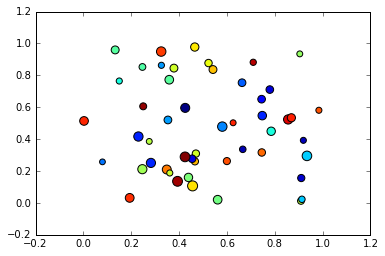

In [30]:
# use numpy to create scatter plots
N = 50

x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area =30+(70*np.random.rand(N)) # 30 to 100 point radiuses
plt.scatter(x, y, s=area, c=colors)

In [31]:
# conditional logic
np.where(rnd > 0, 2, -2)    # args: condition, value if True, value if False

array([[-2,  2],
       [ 2,  2],
       [ 2, -2],
       [ 2,  2]])

In [32]:
np.where(rnd > 0, 2, rnd)   # any of the 3 arguments can be an array

array([[-0.80058131,  2.        ],
       [ 2.        ,  2.        ],
       [ 2.        , -1.83707314],
       [ 2.        ,  2.        ]])

In [33]:
# methods for boolean arrays
(rnd > 0).sum()             # counts number of positive values

6

In [34]:
(rnd > 0).any()             # checks if any value is True

True

In [35]:
(rnd > 0).all()             # checks if all values are True

False

In [36]:
# reshape, transpose, flatten
nums = np.arange(32).reshape(8, 4) # creates 8x4 array
nums

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [37]:
nums.T                       # transpose

array([[ 0,  4,  8, 12, 16, 20, 24, 28],
       [ 1,  5,  9, 13, 17, 21, 25, 29],
       [ 2,  6, 10, 14, 18, 22, 26, 30],
       [ 3,  7, 11, 15, 19, 23, 27, 31]])

In [38]:
nums.flatten()               # flatten

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [39]:
# random numbers
np.random.seed(12234)     # seed fixes the randomness
np.random.rand(2, 3)      # 0 to 1, in the given shape

array([[ 0.00630595,  0.20303476,  0.76478993],
       [ 0.55513384,  0.74358546,  0.93777808]])

In [40]:
np.random.randn(10)         # random normals (mean 0, sd 1)

array([ -2.79962074e-01,   1.31281104e+00,  -9.27155784e-01,
        -4.01302169e-01,  -2.31085929e+00,  -2.08460156e+00,
         4.59241643e-01,   1.62191344e+00,   1.94515120e-01,
        -2.08631547e-03])

In [41]:
np.random.randint(0, 2, 10) # 0 or 1

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1])